In [1]:
#Code written by: Billy Atkinson (watkinson@umces.edu)
#Date of last revision: 06/14/2022
#Code uses the py eddy tracker algorithm to read in eddy data files and maniputlate them to determine values of satellite variables
#inside eddies and otuside of the eddies for analysis
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.dataset.grid import UnRegularGridDataset
from py_eddy_tracker.dataset.grid import GridDataset
from py_eddy_tracker.poly import create_vertice
from matplotlib.path import Path
from numpy import ones

In [5]:
#Loop all anticyclonic eddy files into one big file
file_objects = sorted(glob.glob('/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/*.nc'))
all_a = EddiesObservations.concatenate(
    [EddiesObservations.load_file(i) for i in file_objects]
)
#Loop all cyclonic eddy files into one big file
file_objects = sorted(glob.glob('/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/*.nc'))
all_c = EddiesObservations.concatenate(
    [EddiesObservations.load_file(i) for i in file_objects]
)

In [ ]:
#Edit lon value of data to match eddy data
'''
dir="/data/watkinson/Spring2022/Satellite/data/hycom_ssh/Daily_SSH_files/"
import xarray as xr
ds=xr.open_dataset(dir + "hycom_gomu_501_2006060500_t000.nc")
ds['lon']=ds.lon + 360
ds.to_netcdf("/data/watkinson/Spring2022/Satellite/data/modified_hycom_gomu_501_2006060500_t000.nc")
'''

In [51]:
from py_eddy_tracker import data
def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title)
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    ax.legend()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.95, 0.05, 0.01, 0.9]))

a = EddiesObservations.load_file(data.get_demo_path("Anticyclonic_20160515.nc"))
c = EddiesObservations.load_file(data.get_demo_path("Cyclonic_20160515.nc"))

aviso_map = RegularGridDataset(
    data.get_demo_path("dt_med_allsat_phy_l4_20160515_20190101.nc"),
    "longitude",
    "latitude",
)
aviso_map.add_uv("adt")
#aviso_map
ds = xr.open_dataset("/data/watkinson/anaconda3/lib/python3.8/site-packages/py_eddy_tracker/data/dt_med_allsat_phy_l4_20160515_20190101.nc")
#ds
dl = xr.open_dataset("/data/watkinson/anaconda3/lib/python3.8/site-packages/py_eddy_tracker/data/Cyclonic_20160515.nc")
#dl
dir = "/data/watkinson/Spring2022/Satellite/data/cafe/"
dz = xr.open_dataset(dir + "modified_CAFE_GOM_20061532006160.nc")
print(dz.chlor_a.shape)

We assume pixel position of grid is centered for /data/watkinson/anaconda3/lib/python3.8/site-packages/py_eddy_tracker/data/dt_med_allsat_phy_l4_20160515_20190101.nc


(360, 528)


In [13]:
#Edit lon in satelllite file to be the same as eddy
dir="/data/watkinson/Spring2022/Satellite/data/cafe/8day/"
'''
ds = nc.Dataset(dir + 'sat_data_8day_composite.nc','r+',format='NETCDF4')
lon=ds.lon
#time_dim = ds.createDimension('time', None)
lon_eddy = ds.createVariable('lon_eddy',np.float64)
ds['lon_eddy']=(lon + 360)
#time = float_to_datetime(time)
time[:]=date
'''
import xarray as xr
ds=xr.open_dataset(dir + 'CAFE_GOM_20061532006160.nc')
ds['lon']=ds.lon + 360
ds.to_netcdf("/data/watkinson/Spring2022/Satellite/data/cafe/modified_CAFE_GOM_20061532006160.nc") # rewrite to netcdf

In [56]:
g = RegularGridDataset(
    data.get_demo_path("nrt_global_allsat_phy_l4_20190223_20190226.nc"),
    "longitude",
    "latitude",
)
a = EddiesObservations.load_file(data.get_demo_path("Anticyclonic_20190223.nc"))
ds = xr.open_dataset("/data/watkinson/anaconda3/lib/python3.8/site-packages/py_eddy_tracker/data/nrt_global_allsat_phy_l4_20190223_20190226.nc")
ds
dl = xr.open_dataset("/data/watkinson/anaconda3/lib/python3.8/site-packages/py_eddy_tracker/data/Anticyclonic_20190223.nc")
dl

We assume pixel position of grid is centered for /data/watkinson/anaconda3/lib/python3.8/site-packages/py_eddy_tracker/data/nrt_global_allsat_phy_l4_20190223_20190226.nc


<xarray.Dataset>
Dimensions:                        (obs: 3137, NbSample: 50)
Dimensions without coordinates: obs, NbSample
Data variables: (12/24)
    amplitude                      (obs) float32 ...
    effective_area                 (obs) float32 ...
    effective_contour_height       (obs) float32 ...
    effective_contour_latitude     (obs, NbSample) float32 ...
    effective_contour_longitude    (obs, NbSample) float32 ...
    effective_contour_shape_error  (obs) float32 ...
    ...                             ...
    speed_contour_latitude         (obs, NbSample) float32 ...
    speed_contour_longitude        (obs, NbSample) float32 ...
    speed_contour_shape_error      (obs) float32 ...
    speed_radius                   (obs) float32 ...
    time                           (obs) datetime64[ns] ...
    uavg_profile                   (obs, NbSample) float32 ...
Attributes:
    track_extra_variables:     height_max_speed_contour,height_external_conto...
    track_array_variables:     50
    array_variables:           contour_lon_e,contour_lat_e,contour_lon_s,cont...
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    framework_version:         v3.2.0+67.g1a490b3.dirty
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    rotation_type:             1

We assume pixel position of grid is centered for /data/watkinson/Spring2022/Satellite/data/cafe/modified_CAFE_GOM_20061532006160.nc


[0.063415 0.124615      nan      nan 0.111664      nan      nan 0.086567
 0.05884  0.115774      nan 0.085935 0.085842 0.130034]


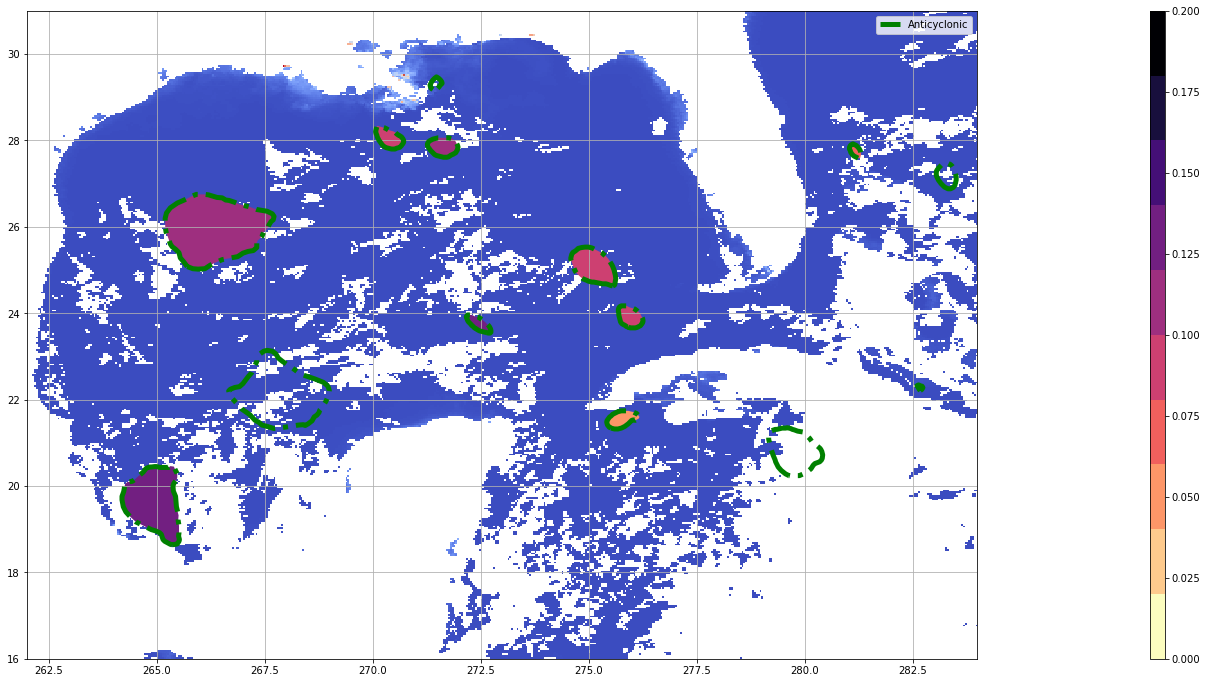

In [74]:
#Get mean of grid in each eddies
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.dataset.grid import UnRegularGridDataset
from py_eddy_tracker.dataset.grid import GridDataset
from py_eddy_tracker.poly import create_vertice
from matplotlib.path import Path
from numpy import ones
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))
ax.set_aspect("equal")
dir = "/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/"
a = EddiesObservations.load_file(dir + "Cyclonic_20060605.nc")

dir = "/data/watkinson/Spring2022/Satellite/data/cafe/"
sat_data_8day = RegularGridDataset((dir + "modified_CAFE_GOM_20061532006160.nc"),
    "lon",
    "lat")
sat_data_8day.add_grid('chlor_a',sat_data_8day.grid("chlor_a"))
sat_data_8day.display(ax, "chlor_a")
eke_kwargs = dict(vmin=0, vmax=.2, cmap="magma_r")
a.display(ax, label="Anticyclonic", color="g", lw=5, extern_only=True)
eke = a.interp_grid(sat_data_8day, "chlor_a", method="nearest",intern=False)#method="mean"
eke[eke < 0]=np.nan
print(eke)
m = a.filled(ax,eke, **eke_kwargs)
update_axes(ax, m)

We assume pixel position of grid is centered for /data/watkinson/Spring2022/Satellite/data/cafe/modified_CAFE_GOM_20061532006160.nc


'\nchlor_a.mask[:] = mask\nsat_data_8day.display(ax, "chlor_a")\na.display(ax, label="Anticyclonic", color="g", lw=1, extern_only=True)\n'

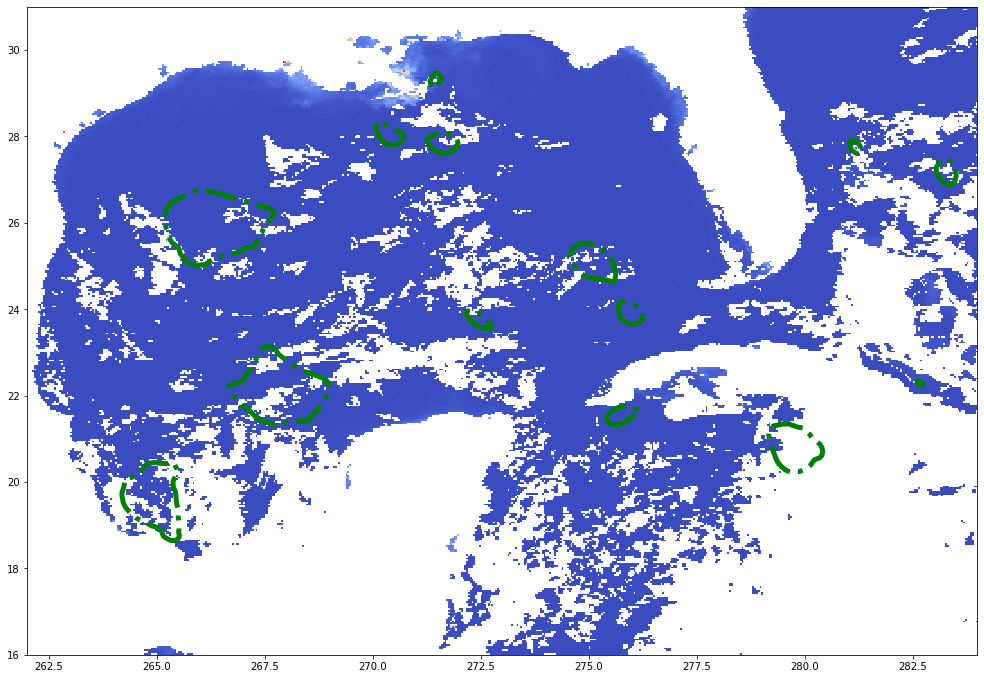

In [8]:
#Get mean of grid in each eddies
def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title)
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    ax.legend()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.95, 0.05, 0.01, 0.9]))
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.dataset.grid import UnRegularGridDataset
from py_eddy_tracker.dataset.grid import GridDataset
from py_eddy_tracker.poly import create_vertice
from matplotlib.path import Path
from numpy import ones
dir = "/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/"
a = EddiesObservations.load_file(dir + "Cyclonic_20060605.nc")
#a = UnRegularGridDataset((dir + "Anticyclonic_20060605.nc"),"effective_contour_longitude","effective_contour_longitude")
#dir = "/data/watkinson/Spring2022/Satellite/data/cafe/8day/"
dir = "/data/watkinson/Spring2022/Satellite/data/cafe/"
sat_data = RegularGridDataset((dir + "modified_CAFE_GOM_20061532006160.nc"),
    "lon",
    "lat")

fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))
ax.set_aspect("equal")
# We will used the outter contour
x_name, y_name = a.intern(False)
chlor_a = sat_data_8day.grid("chlor_a")
chlor_a = np.transpose(chlor_a)
#print(chlor_a)
mask = ones(chlor_a.shape, dtype="bool")
#print(chlor_a.shape)
for eddy in a:
    i, j = Path(create_vertice(eddy[x_name], eddy[y_name])).pixels_in(sat_data_8day)
    mask[i, j] = False

chlor_a.mask[:] += ~mask
sat_data_8day.display(ax, "chlor_a")
a.display(ax, label="Anticyclonic", color="g", lw=5, extern_only=True)
'''
chlor_a.mask[:] = mask
sat_data_8day.display(ax, "chlor_a")
a.display(ax, label="Anticyclonic", color="g", lw=1, extern_only=True)
'''